In [41]:
'''Here I take a csv file of consumer complaints and take the most relevant fields that is the product and the customer review
thenas the product is a category I integer encode it. Then create a dictionary mapping the int value to product name '''

'Here I take a csv file of consumer complaints and take the most relevant fields that is the product and the customer review\nthenas the product is a category I integer encode it. Then create a dictionary mapping the int value to product name '

In [49]:
import pandas as pd

In [53]:
df=pd.read_csv('Consumer_Complaints.csv', low_memory= False)


In [54]:
df.head(n=5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [55]:
#check for null value
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                     198202
Issue                                0
Sub-issue                       400730
Consumer complaint narrative    555894
Company public response         525401
Company                              0
State                             5305
ZIP code                          5324
Tags                            575868
Consumer consent provided?      462447
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?               41419
Complaint ID                         0
dtype: int64

In [56]:
#check the data shape
df.shape

(670598, 18)

In [57]:
#the customer narrative is the most important field so to make 
#useful in 
#from the above analysis it is evident that the data relating to the customer complaint narrative is going to be important
# and it has 555894 nan field please remove these rows
df.dropna(subset=['Consumer complaint narrative'] , inplace =True)
#===========>>>>
# df = df[pd.notnull(df['Consumer complaint narrative'])]

In [58]:
df.shape # removed the null rows of the dataframe

(114704, 18)

In [59]:
df.isnull().sum()
# Consumer complaint narrative        0

Date received                       0
Product                             0
Sub-product                     35784
Issue                               0
Sub-issue                       57448
Consumer complaint narrative        0
Company public response         57417
Company                             0
State                             348
ZIP code                          353
Tags                            95333
Consumer consent provided?          0
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?               8421
Complaint ID                        0
dtype: int64

In [60]:
# create a new dataframe with the important parameters product and Consumer consent provided
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [61]:
col = ['Product','Consumer complaint narrative']

In [62]:
df_new =df[col]

In [63]:
#df['category_id'] = df['Product'].factorize()[0] # basically making the product category OHE
df_new['category_id'] = df['Product'].factorize()[0]

C:\Users\Anirban\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
df_new.head(n=5)

,Product,Consumer complaint narrative,category_id
57729,Credit card,Received Capital One charge card offer XXXX. A...,0
57787,Debt collection,I do n't know how they got my cell number. I t...,1
57838,Credit card,I 'm a longtime member of Charter One Bank/RBS...,0
57848,Credit reporting,"After looking at my credit report, I saw a col...",2
57852,Debt collection,I received a call from a XXXX XXXX from XXXX @...,1


In [65]:
category_id_df = df_new[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values) # {key : 'Product Name' ,value :'integer encoding'}
id_to_category = dict(category_id_df[['category_id', 'Product']].values) # (reverse) {key: 'interger encoding' , value: 'Product Name'}

In [66]:
for i ,v in category_to_id.items():
    print( i ,v)


Credit card 0
Debt collection 1
Credit reporting 2
Student loan 3
Mortgage 4
Payday loan 5
Bank account or service 6
Consumer Loan 7
Money transfers 8
Prepaid card 9
Other financial service 10
Virtual currency 11


In [67]:
for i ,v in id_to_category.items():
    print( i ,v)

0 Credit card
1 Debt collection
2 Credit reporting
3 Student loan
4 Mortgage
5 Payday loan
6 Bank account or service
7 Consumer Loan
8 Money transfers
9 Prepaid card
10 Other financial service
11 Virtual currency


In [68]:
import matplotlib.pyplot as plt
df_new.groupby('Product').Consumer complaint narrative.count().plot.bar

SyntaxError: invalid syntax (<ipython-input-68-b18207e471f2>, line 2)

In [69]:
df_new.columns=['Product' , 'Consumer_complaint_narratives' , 'category_id']

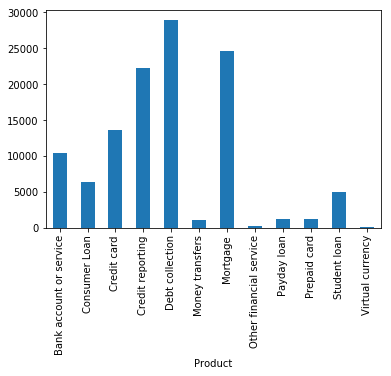

In [70]:
import matplotlib.pyplot as plt
df_new.groupby('Product').Consumer_complaint_narratives.count().plot.bar()
plt.show()

In [77]:
df_new.shape

(114704, 3)

In [93]:
df_new_1=df_new.iloc[:1000,:]

In [94]:
df_new_1.shape

(1000, 3)

In [106]:
df_new_1.columns

Index(['Product', 'Consumer_complaint_narratives', 'category_id'], dtype='object')

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_new_1.Consumer_complaint_narratives).toarray()
labels = df_new_1.category_id
features.shape

(1000, 3262)

In [100]:
from sklearn.feature_selection import chi2
import numpy as np
N=2
for product , category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features , labels)
    indices=np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train , X_test ,y_train ,y_test = train_test_split(df_new_1['Consumer_complaint_narratives'], df_new_1['Product'], random_state=42)

In [112]:
Count_Vectorizer = CountVectorizer()
X_train_count=Count_Vectorizer.fit_transform(X_train)

In [119]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
clf = MultinomialNB().fit(X_train_tfidf,y_train)


In [121]:
print(clf.predict((Count_Vectorizer.transform(['I want to open a new Savings Bank account with this Branch of the Bank']))))

['Debt collection']
